In [1]:
import os
os.chdir('..')

In [2]:
import torch
import numpy as np
from gnn_library.util import load
from evaluate import evaluate_model
from instance_generator import sample_instances
from params import *
from util import _box_plots

%load_ext autoreload
%autoreload 2

In [5]:
device = torch.device('cuda:4' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

GNN, args = load('GNN_large_10_6', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:4


## Box plot baseline evaluation

#### Evaluate CRs on all graph configurations

In [6]:
import pickle # TODO remove

rng = np.random.default_rng()
num_trials = 150
batch_size = 500
node_configs = [(20, 10)]
graph_configs = MAIN_TESTING_GRAPH_CONFIGS
baselines_kwargs = {
    'greedy': {},
    'greedy_t': {'threshold': 0.35},
    'lp_rounding': {'rng': rng},
    'naor_lp_rounding': {'rng': rng},
    'pollner_lp_rounding': {'rng': rng}
}

data = {node_config: {} for node_config in node_configs}

for node_config in node_configs:
    for graph_config in graph_configs:
            print(node_config, graph_config)
            instances = sample_instances(
                *node_config,
                num_trials,
                rng,
                args.__dict__,
                **graph_config
            )

            cr_ratios, _ = evaluate_model(
                meta_model=None,
                meta_model_type=None,
                base_models=[GNN],
                instances=instances,
                batch_size=batch_size,
                rng=rng,
                num_realizations=20,
                baselines=['greedy', 'greedy_t', 'lp_rounding', 'naor_lp_rounding', 'pollner_lp_rounding'],
                **baselines_kwargs
            )

            data[node_config][str(graph_config)] = cr_ratios

            with open(f"experiments/box_plots_main.pickle", 'wb') as handle:
                pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)


(20, 10) {'graph_type': 'ER', 'p': 0.5, 'weighted': True}


/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

/home/alexhay/GNN-OBM/algorithms.py:265: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom


(20, 10) {'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.s

/home/alexhay/GNN-OBM/torch_converter.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(mask)


Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.edu"
Set parameter TokenServer to value "soal-nas.stanford.ed

#### Generate box plots

{'graph_type': 'ER', 'p': 0.5, 'weighted': True} {'learned': [0.9646994039749617, 0.970533939121607, 0.9699743745241927, 0.951436561505556, 0.9579623254478598, 0.932854807637435, 0.9607103137793948, 0.9497485851705051, 0.9529180866148836, 0.9224118404336711, 0.9235360142707847, 0.9367890808542633, 0.9375922924307574, 0.9580228842898844, 0.9586022278043238, 0.9411405970914432, 0.9622605385629743, 0.9459624984706837, 0.9486506319518625, 0.9272581532257032, 0.9774414283608269, 0.957741341774903, 0.98327269332053, 0.9463530199482963, 0.9329210371356608, 0.9407189854069731, 0.9439275058343689, 0.9519029446392505, 0.8966708626464011, 0.9211969551544769, 0.9595886366405205, 0.9621957876848594, 0.9584814920194432, 0.9513812912358715, 0.9363788691643, 0.9388822884829532, 0.9417550506768763, 0.9526570758801091, 0.957891753336145, 0.9171265938924863, 0.9425077145882822, 0.9090734607166151, 0.9257500893891348, 0.9830290088013696, 0.9249859125947644, 0.9393565757935693, 0.9745967699042491, 0.941544

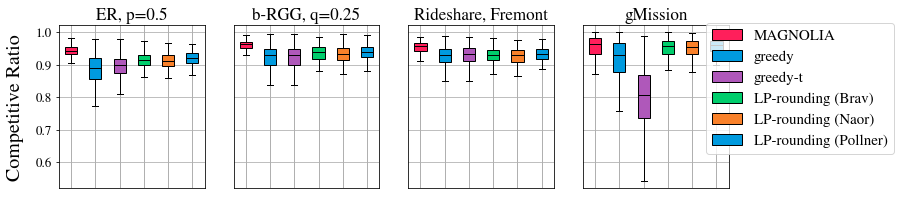

In [7]:
results = {}
for graph_type, val in data[node_configs[0]].items():
	results[graph_type] = val
	print(f"{graph_type} {val}")

_box_plots(results, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

In [30]:
for label in ['learned', 'greedy', 'greedy_t', 'lp_rounding', 'naor_lp_rounding', 'pollner_lp_rounding']:
    print(label)
    print(np.nanmean(results["{'graph_type': 'ER', 'p': 0.5, 'weighted': True}"][label]))
    print(np.nanstd(results["{'graph_type': 'ER', 'p': 0.5, 'weighted': True}"][label]))
    print(np.nanmax(results["{'graph_type': 'ER', 'p': 0.5, 'weighted': True}"][label]))
    print(np.nanmin(results["{'graph_type': 'ER', 'p': 0.5, 'weighted': True}"][label]))
    print()

learned
0.9375406822946877
0.020488721688707814
0.9770632668156484
0.8906075746635768

greedy
0.8832660468014378
0.042111343516759936
0.9695886660041662
0.773918419580194

greedy_t
0.8943132303877158
0.034755100745926415
0.9634036702937727
0.8235931314200542

lp_rounding
0.9160779507565222
0.021609797545870682
0.9605348860405354
0.8639270548190373

naor_lp_rounding
0.9138430650193456
0.021827750625309453
0.9597701078420974
0.859539364718328

pollner_lp_rounding
0.9200531820781406
0.019780583620047858
0.9602326865163937
0.8708671887402302

